# Ideb

**Sobre o ideb**

O Ideb (Índice de desenvolvimento da educação básica) é um indicador de qualidade educacional que combina informações de desempenho em exames padronizados (Prova Brasil ou Saeb) – obtido pelos estudantes ao final das etapas de ensino (4ª e 8ª séries do ensino fundamental e 3ª série do ensino médio) – com informações sobre rendimento escolar (aprovação).

A partir de 2019 o Saeb incluirá também a educação infantil, e os exames serão além de português e matemática, de ciências da natureza e ciências humanas. Os exames serão aplicados de dois em dois anos, sempre nos anos ímpares, com a divulgação do resultado nos anos pares.

A metodologia do ideb foi aplicada aos países da OCDE (Organização para a Cooperação e o Desenvolvimento Econômico), e verificou-se que 6 é média necessária para estar entre os 20 melhores colocados, por isso o governo fixou em 6 a meta a ser perseguida para 2022.

Segundo o portal do MEC, todos os mais de 5500 municípios aderiram ao compromisso com as metas do ideb. Nos locais em que se verificar uma maior necessidade de investimento, o governo se dispôs a usar verbas do Fundeb (Fundo da Educação Básica) para que as metas sejam atingidas.

> Fontes dos dados:
* [Inep - Resultados do ideb](http://ideb.inep.gov.br/resultado/resultado/)
* [Inep - Resumo técnico (planilhas)](http://portal.inep.gov.br/web/guest/educacao-basica/ideb/resultados)

Nas análises realizadas, existem algumas categorias utilizadas pelo MEC para agrupar os dados.

> **Séries**:
* Ensino Fundamental – Anos Iniciais;
* Ensino Fundamental – Anos Finais;
* Ensino Médio.

> **Tipo**:
* Ideb (Nota do ideb);
* Meta (Meta do ideb).

> **Administração / rede**:
* Total (escolas públicas urbanas e rurais, escolas privadas urbanas e rurais);
* Rede Pública (escolas públicas urbanas e rurais);
* Rede Estadual (escolas urbanas da rede estadual);
* Rede Municipal (escolas urbanas da rede municipal);
* Rede Privada (escolas urbanas e rurais da rede privada).

In [61]:
# Carregar bibliotecas
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from cycler import cycler

In [3]:
# Extrair dados da planilha
base_dados = pd.read_csv('data/ideb_nacional_final.csv', delimiter=";")

In [4]:
# Ver primeiros dados do dataframe
base_dados.head()

,series,tipo,administracao,2005,2007,2009,2011,2013,2015,2017,2019,2021
0,anos iniciais,ideb,total,3.8,4.2,4.6,5.0,5.2,5.5,5.8,NaN,NaN
1,anos iniciais,ideb,estadual,3.9,4.3,4.9,5.1,5.4,5.8,6.0,NaN,NaN
2,anos iniciais,ideb,municipal,3.4,4.0,4.4,4.7,4.9,5.3,5.6,NaN,NaN
3,anos iniciais,ideb,privada,5.9,6.0,6.4,6.5,6.7,6.8,7.1,NaN,NaN
4,anos iniciais,ideb,pública,3.6,4.0,4.4,4.7,4.9,5.3,5.5,NaN,NaN


Com a função `describe()` podemos perceber algumas coisas. Temos 28 registros, algumas colunas com valores NaN. Amplitude entre valor mínimo e máximo é baixa (uns 4 pontos), nem as médias nem os desvios variam muito.

In [5]:
base_dados.describe()

,2005,2007,2009,2011,2013,2015,2017,2019,2021
count,14.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,14.000000,14.000000
mean,3.900000,4.046429,4.278571,4.489286,4.678571,4.942857,5.207143,5.592857,5.821429
std,1.045135,0.989756,1.008981,1.013370,1.001243,0.998676,1.030616,0.899114,0.871937
min,3.000000,3.100000,3.200000,3.300000,3.400000,3.500000,3.500000,4.600000,4.900000
25%,3.225000,3.375000,3.500000,3.700000,3.900000,4.200000,4.475000,5.000000,5.200000
50%,3.450000,3.600000,3.900000,4.150000,4.450000,4.750000,5.050000,5.300000,5.600000
75%,3.875000,4.225000,4.675000,5.025000,5.250000,5.350000,5.800000,5.850000,6.075000
max,5.900000,6.000000,6.400000,6.600000,6.800000,7.000000,7.200000,7.400000,7.500000


## 1 - Anos iniciais do ensino fundamental (4º série)

**1.1) Verificar desempenho do ideb apenas do total (Anos iniciais)**

In [6]:
# criar dataframe apenas das linhas dos anos iniciais, do tipo ideb
ideb_anos_iniciais = base_dados[
        (base_dados['series'] == 'anos iniciais') & (base_dados['tipo'] == 'ideb')].dropna(axis='columns')
ideb_anos_iniciais

,series,tipo,administracao,2005,2007,2009,2011,2013,2015,2017
0,anos iniciais,ideb,total,3.8,4.2,4.6,5.0,5.2,5.5,5.8
1,anos iniciais,ideb,estadual,3.9,4.3,4.9,5.1,5.4,5.8,6.0
2,anos iniciais,ideb,municipal,3.4,4.0,4.4,4.7,4.9,5.3,5.6
3,anos iniciais,ideb,privada,5.9,6.0,6.4,6.5,6.7,6.8,7.1
4,anos iniciais,ideb,pública,3.6,4.0,4.4,4.7,4.9,5.3,5.5


In [8]:
# Criar nova dataframe com a transposta selecionando apenas as colunas com as notas
ideb_anos_iniciais_total = ideb_anos_iniciais.loc[ideb_anos_iniciais['administracao'] == 'total'][ideb_anos_iniciais.columns[3:]].T
# Criar novos índices
ideb_anos_iniciais_total.reset_index(inplace=True)
# Renomear coluna
ideb_anos_iniciais_total.columns = ['Anos', 'Notas']

# Agora vamos criar uma coluna com a média para fazermos uma comparação dos valores de cada ano com a média
ideb_anos_iniciais_total['Media'] = ideb_anos_iniciais_total['Notas'].mean()
ideb_anos_iniciais_total

,Anos,Notas,Media
0,2005,3.8,4.871429
1,2007,4.2,4.871429
2,2009,4.6,4.871429
3,2011,5.0,4.871429
4,2013,5.2,4.871429
5,2015,5.5,4.871429
6,2017,5.8,4.871429


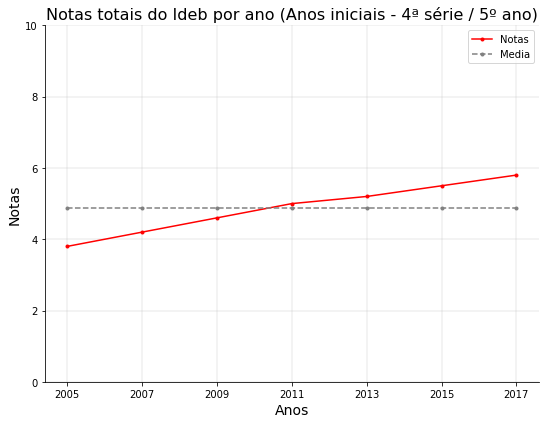

In [9]:
# plotar gráfico
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(ideb_anos_iniciais_total['Anos'], ideb_anos_iniciais_total['Notas'], '.-', color='red')
ax.plot(ideb_anos_iniciais_total['Anos'], ideb_anos_iniciais_total['Media'], '--.', color='grey')
ax.legend(loc='best')
ax.set_ylim(0, 10)
ax.set_ylabel('Notas', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax.set_title('Notas totais do Ideb por ano (Anos iniciais - 4ª série / 5º ano)', fontsize=16)
ax.grid(lw=0.3)
sns.despine()

plt.tight_layout()
plt.show()
fig.savefig('images/ideb_anos_iniciais_total_nacional.png')

Observando o gráfico, podemos perceber um crescimento no ideb ano após ano. O crescimento de 2005 até 2017 foi de aproximadamente 2 pontos.

**1.2) Verificar o Ideb por administração (Anos iniciais)**

In [10]:
# Atribuir valores das colunas dos anos, menos a primeira linha que é o total 
# fazendo a transposta, de forma que os índices sejam os anos
ideb_anos_iniciais_admin = ideb_anos_iniciais.drop(['series', 'tipo', 'administracao'], axis=1).loc[1:].T

# Criar novos índices
ideb_anos_iniciais_admin.reset_index(inplace=True)
# Colunas
cols = np.array(ideb_anos_iniciais['administracao'][1:])
# Adicionar coluna Anos na posição zero
cols = np.insert(cols, 0, 'Anos')

# Atribuir as colunas para o novo dataframe
ideb_anos_iniciais_admin.columns = cols
ideb_anos_iniciais_admin

,Anos,estadual,municipal,privada,pública
0,2005,3.9,3.4,5.9,3.6
1,2007,4.3,4.0,6.0,4.0
2,2009,4.9,4.4,6.4,4.4
3,2011,5.1,4.7,6.5,4.7
4,2013,5.4,4.9,6.7,4.9
5,2015,5.8,5.3,6.8,5.3
6,2017,6.0,5.6,7.1,5.5


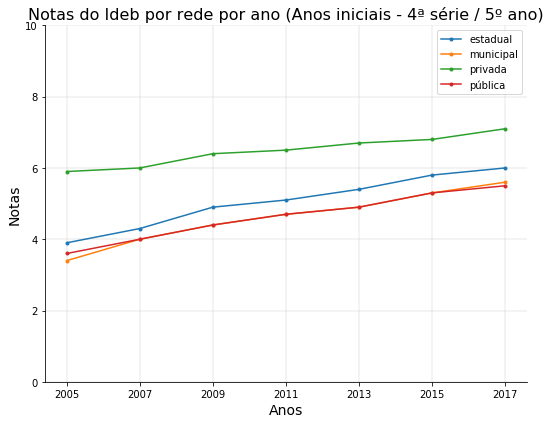

In [13]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(ideb_anos_iniciais_admin['Anos'], ideb_anos_iniciais_admin.iloc[:, 1:], '.-')
ax.legend(ideb_anos_iniciais_admin.iloc[:, 1:].columns, loc='best')
ax.set_ylabel('Notas', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax.set_ylim(0, 10)
ax.set_title('Notas do Ideb por rede por ano (Anos iniciais - 4ª série / 5º ano)', fontsize=16)
plt.grid(lw=0.3)
sns.despine()

plt.tight_layout()
plt.show()
fig.savefig('images/ideb_anos_iniciais_admin_nacional.png')

Comparando o Ideb por administração, podemos ver um crescimento de todas as administrações, com um desempenho melhor das escolas da rede privada, seguido das escolas estaduais e depois municipais.

**1.3) Ideb x metas (Anos inicias) **

Vamos verificar a medição do ideb e das metas para cada ano. Com isto podemos avaliar se as metas definidas estão sendo atingidas, e quem não está as atigindo.

In [14]:
# Selecionar as notas e metas dos anos iniciais
# vamos manter os dados vazios, pois são dados que de fato não existem
ideb_metas_anos_iniciais = base_dados[base_dados['series'] == 'anos iniciais'].drop(['series'], axis=1)
ideb_metas_anos_iniciais

,tipo,administracao,2005,2007,2009,2011,2013,2015,2017,2019,2021
0,ideb,total,3.8,4.2,4.6,5.0,5.2,5.5,5.8,NaN,NaN
1,ideb,estadual,3.9,4.3,4.9,5.1,5.4,5.8,6.0,NaN,NaN
2,ideb,municipal,3.4,4.0,4.4,4.7,4.9,5.3,5.6,NaN,NaN
3,ideb,privada,5.9,6.0,6.4,6.5,6.7,6.8,7.1,NaN,NaN
4,ideb,pública,3.6,4.0,4.4,4.7,4.9,5.3,5.5,NaN,NaN
5,meta,total,NaN,3.9,4.2,4.6,4.9,5.2,5.5,5.7,6.0
6,meta,estadual,NaN,4.0,4.3,4.7,5.0,5.3,5.6,5.9,6.1
7,meta,municipal,NaN,3.5,3.8,4.2,4.5,4.8,5.1,5.4,5.7
8,meta,privada,NaN,6.0,6.3,6.6,6.8,7.0,7.2,7.4,7.5
9,meta,pública,NaN,3.6,4.0,4.4,4.7,5.0,5.2,5.5,5.8


In [15]:
# Vamor criar um dataframe apenas com os idebs, eliminando colunas indesejadas
# mudando o nome das colunas e fazendo a transposta
idm_nota1 = ideb_metas_anos_iniciais[ideb_metas_anos_iniciais['tipo'] == 'ideb'].drop(['tipo', 'administracao'], axis=1).T
idm_nota1.columns = ideb_metas_anos_iniciais['administracao'].unique()
idm_nota1

,total,estadual,municipal,privada,pública
2005,3.8,3.9,3.4,5.9,3.6
2007,4.2,4.3,4.0,6.0,4.0
2009,4.6,4.9,4.4,6.4,4.4
2011,5.0,5.1,4.7,6.5,4.7
2013,5.2,5.4,4.9,6.7,4.9
2015,5.5,5.8,5.3,6.8,5.3
2017,5.8,6.0,5.6,7.1,5.5
2019,NaN,NaN,NaN,NaN,NaN
2021,NaN,NaN,NaN,NaN,NaN


In [17]:
# Vamor criar um dataframe apenas com as metas, eliminando colunas indesejadas
# mudando o nome das colunas e fazendo a transposta
idm_meta1 = ideb_metas_anos_iniciais[ideb_metas_anos_iniciais['tipo'] == 'meta'].drop(['tipo', 'administracao'], axis=1).T
idm_meta1.columns = ideb_metas_anos_iniciais['administracao'].unique()
idm_meta1

,total,estadual,municipal,privada,pública
2005,NaN,NaN,NaN,NaN,NaN
2007,3.9,4.0,3.5,6.0,3.6
2009,4.2,4.3,3.8,6.3,4.0
2011,4.6,4.7,4.2,6.6,4.4
2013,4.9,5.0,4.5,6.8,4.7
2015,5.2,5.3,4.8,7.0,5.0
2017,5.5,5.6,5.1,7.2,5.2
2019,5.7,5.9,5.4,7.4,5.5
2021,6.0,6.1,5.7,7.5,5.8


In [18]:
# Para desenhar os gráficos, precisamos que eles estejam na mesma escala para não nos confundirmos na leitura
# Para isso vamos pegar o maior valores dos dataframes, e o menor
higher_value = max([idm_nota1.max().max(), idm_meta1.max().max()])
lower_value = min([idm_nota1.min().min(), idm_meta1.min().min()])

# Mas como sabemos, as notas do ideb vão de 0 a 10, portanto como são valores fixos podemos fixar estes valores em Y
higher_value = 10
lower_value = 0

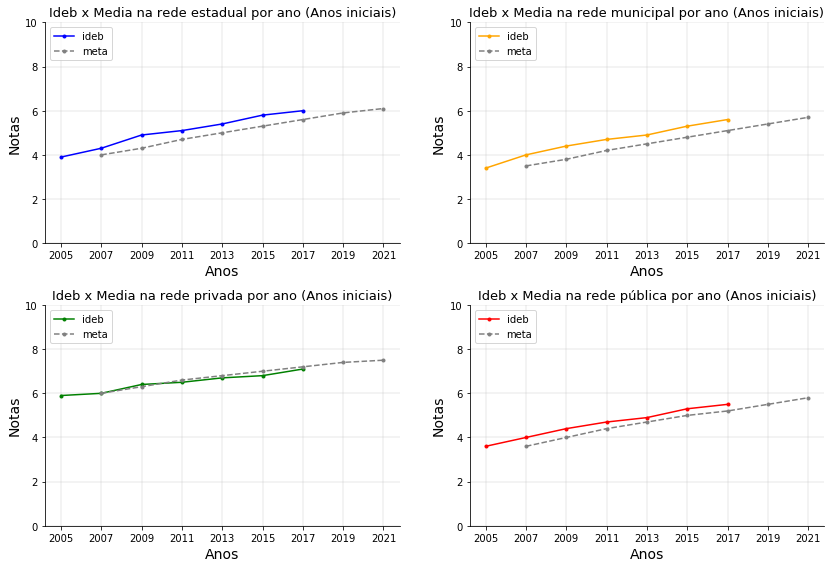

In [48]:
cols = ['ideb', 'meta'] # legendas
colors = ['white','blue', 'orange', 'green', 'red'] # cores das linhas

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plotar os gráficos
for i,j in zip(idm_nota1.columns[1:], range(1,5)):
    plt.subplot(2,2,j)
    plt.plot(idm_nota1.index, idm_nota1[i], '.-', color=colors[j])
    plt.plot(idm_meta1.index, idm_meta1[i], '.--', color='grey')
    plt.legend(cols, loc='upper left')
    plt.ylim(lower_value, higher_value)
    plt.ylabel('Notas', fontsize=14)
    plt.xlabel('Anos', fontsize=14)
    plt.title('Ideb x Media na rede ' + i + ' por ano (Anos iniciais)', fontsize=13)
    plt.grid(linestyle='-', linewidth=0.3)
    sns.despine()
    
plt.tight_layout()
plt.show()
fig.savefig('images/nota_media_anos_iniciais_nacional.png')

Observando os gráficos podemos verificar:
* Os idebs tem crescido sem nenhuma vez terem tido queda;
* As metas do ideb da `educação estadual, municipal e pública` foram batidas em todos os anos;
* A educação `privada` é a com maior ideb (acima de 7 pontos na última medição), mas a única que não bateu todas suas metas (bateu em 2007 e 2009, e nas demais oportunidades esteve muito próxima). 

## 2 - Anos finais do ensino fundamental (5º - 9º séries)

**2.1) Verificar desempenho do ideb apenas do total (Anos finais)**

In [20]:
# criar dataframe apenas das linhas dos anos iniciais, do tipo ideb
ideb_anos_finais = base_dados[
    (base_dados['series'] == 'anos finais do ensino fundamental') & (base_dados['tipo'] == 'ideb')
].dropna(axis='columns')
ideb_anos_finais

,series,tipo,administracao,2005,2007,2009,2011,2013,2015,2017
10,anos finais do ensino fundamental,ideb,total,3.5,3.8,4.0,4.1,4.2,4.5,4.7
11,anos finais do ensino fundamental,ideb,estadual,3.3,3.6,3.8,3.9,4.0,4.2,4.5
12,anos finais do ensino fundamental,ideb,municipal,3.1,3.4,3.6,3.8,3.8,4.1,4.3
13,anos finais do ensino fundamental,ideb,privada,5.8,5.8,5.9,6.0,5.9,6.1,6.4
14,anos finais do ensino fundamental,ideb,pública,3.2,3.5,3.7,3.9,4.0,4.2,4.4


In [21]:
# Criar nova dataframe com a transposta selecionando apenas as colunas com as notas
ideb_anos_finais_total = ideb_anos_finais.loc[ideb_anos_finais['administracao'] == 'total'].drop(['series', 'tipo', 'administracao'], axis=1)[:1].T

# Criar novos índices
ideb_anos_finais_total.reset_index(inplace=True)
# Renomear coluna
ideb_anos_finais_total.columns = ['Anos', 'Notas']

# Agora vamos criar uma coluna com a média para fazermos uma comparação dos valores de cada ano com a média
ideb_anos_finais_total['Medias'] = ideb_anos_finais_total['Notas'].mean()
ideb_anos_finais_total

,Anos,Notas,Medias
0,2005,3.5,4.114286
1,2007,3.8,4.114286
2,2009,4.0,4.114286
3,2011,4.1,4.114286
4,2013,4.2,4.114286
5,2015,4.5,4.114286
6,2017,4.7,4.114286


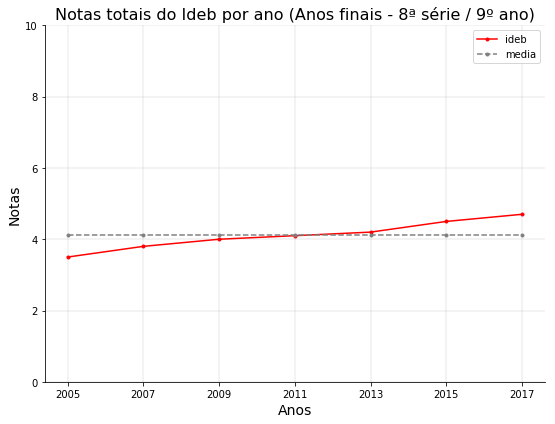

In [46]:
cols = ['ideb', 'media'] # legendas

# plotar gráfico
fig,ax = plt.subplots(figsize=(8,6))

ax.plot(ideb_anos_finais_total['Anos'], ideb_anos_finais_total['Notas'], '.-', color='red')
ax.plot(ideb_anos_finais_total['Anos'], ideb_anos_finais_total['Medias'], '--.', color='grey')
ax.legend(cols, loc='best')
ax.set_ylim(0, 10)
ax.set_title('Notas totais do Ideb por ano (Anos finais - 8ª série / 9º ano)', fontsize=16)
ax.set_ylabel('Notas', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
plt.grid(lw=0.3)
sns.despine()

plt.tight_layout()
plt.show()
fig.savefig('images/ideb_anos_finais_total_nacional.png')

Podemos perceber que o ideb dos anos finais também tem crescido regularmente, mas com crescimente de pouco mais de 1 ponto entre 2005 e 2017.

**2.2) Verificar o Ideb por administração (Anos finais)**

In [23]:
# Atribuir valores das colunas dos anos, menos a primeira linha que é o total 
# fazendo a transposta, de forma que os índices sejam os anos
ideb_anos_finais_admin = ideb_anos_finais.drop(['series', 'tipo', 'administracao'], axis=1)[1:].T

# Criar novos índices
ideb_anos_finais_admin.reset_index(inplace=True)
# Colunas
cols = np.array(ideb_anos_finais['administracao'][1:])
# Adicionar coluna Anos na posição zero
cols = np.insert(cols, 0, 'Anos')

# Atribuir as colunas para o novo dataframe
ideb_anos_finais_admin.columns = cols
ideb_anos_finais_admin

,Anos,estadual,municipal,privada,pública
0,2005,3.3,3.1,5.8,3.2
1,2007,3.6,3.4,5.8,3.5
2,2009,3.8,3.6,5.9,3.7
3,2011,3.9,3.8,6.0,3.9
4,2013,4.0,3.8,5.9,4.0
5,2015,4.2,4.1,6.1,4.2
6,2017,4.5,4.3,6.4,4.4


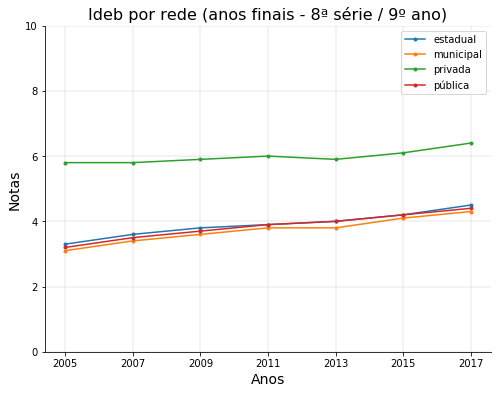

In [24]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(ideb_anos_finais_admin['Anos'], ideb_anos_finais_admin.iloc[:, 1:], '.-' )
ax.legend(ideb_anos_finais_admin.iloc[:, 1:], loc='best')
ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel('Notas', fontsize=14)
ax.set_title('Ideb por rede (anos finais - 8ª série / 9º ano)', fontsize=16)
ax.set_ylim(0, 10)
sns.despine()

plt.grid(lw=0.3)
plt.show()
fig.savefig('images/ideb_anos_finais_admin_nacional.png')

* O melhor ideb é o da rede privada que teve leve crescimento entre de 2005 a última medição em 2017. 
* Houve um recuo nesse crescimento em 2013. 
* Os demais idebs depois apresentaram crescimento de aproximadamente 1 ponto entre 2003 e 2017, com o melhor desempenho da rede estadual.

**2.3) Ideb x metas (anos finais)**

In [25]:
# Vamos usar apenas as series dos anos finais, e tirar esta coluna
ideb_metas_anos_finais = base_dados[base_dados['series'] == 'anos finais do ensino fundamental'].drop(['series'], axis=1)
ideb_metas_anos_finais

,tipo,administracao,2005,2007,2009,2011,2013,2015,2017,2019,2021
10,ideb,total,3.5,3.8,4.0,4.1,4.2,4.5,4.7,NaN,NaN
11,ideb,estadual,3.3,3.6,3.8,3.9,4.0,4.2,4.5,NaN,NaN
12,ideb,municipal,3.1,3.4,3.6,3.8,3.8,4.1,4.3,NaN,NaN
13,ideb,privada,5.8,5.8,5.9,6.0,5.9,6.1,6.4,NaN,NaN
14,ideb,pública,3.2,3.5,3.7,3.9,4.0,4.2,4.4,NaN,NaN
15,meta,total,NaN,3.5,3.7,3.9,4.4,4.7,5.0,5.2,5.5
16,meta,estadual,NaN,3.3,3.5,3.8,4.2,4.5,4.8,5.1,5.3
17,meta,municipal,NaN,3.1,3.3,3.5,3.9,4.3,4.6,4.9,5.1
18,meta,privada,NaN,5.8,6.0,6.2,6.5,6.8,7.0,7.1,7.3
19,meta,pública,NaN,3.3,3.4,3.7,4.1,4.5,4.7,5.0,5.2


In [26]:
# Vamor criar um dataframe apenas com os idebs, eliminando colunas indesejadas
# mudando o nome das colunas e fazendo a transposta
idm_nota2 = ideb_metas_anos_finais[ideb_metas_anos_finais['tipo'] == 'ideb'].drop(['tipo', 'administracao'], axis=1).T
idm_nota2.columns = ideb_metas_anos_finais['administracao'].unique()
idm_nota2

,total,estadual,municipal,privada,pública
2005,3.5,3.3,3.1,5.8,3.2
2007,3.8,3.6,3.4,5.8,3.5
2009,4.0,3.8,3.6,5.9,3.7
2011,4.1,3.9,3.8,6.0,3.9
2013,4.2,4.0,3.8,5.9,4.0
2015,4.5,4.2,4.1,6.1,4.2
2017,4.7,4.5,4.3,6.4,4.4
2019,NaN,NaN,NaN,NaN,NaN
2021,NaN,NaN,NaN,NaN,NaN


In [27]:
# Vamor criar um dataframe apenas com as metas, eliminando colunas indesejadas
# mudando o nome das colunas e fazendo a transposta
idm_meta2 = ideb_metas_anos_finais[ideb_metas_anos_finais['tipo'] == 'meta'].drop(['tipo', 'administracao'], axis=1).T
idm_meta2.columns = ideb_metas_anos_finais['administracao'].unique()
idm_meta2

,total,estadual,municipal,privada,pública
2005,NaN,NaN,NaN,NaN,NaN
2007,3.5,3.3,3.1,5.8,3.3
2009,3.7,3.5,3.3,6.0,3.4
2011,3.9,3.8,3.5,6.2,3.7
2013,4.4,4.2,3.9,6.5,4.1
2015,4.7,4.5,4.3,6.8,4.5
2017,5.0,4.8,4.6,7.0,4.7
2019,5.2,5.1,4.9,7.1,5.0
2021,5.5,5.3,5.1,7.3,5.2


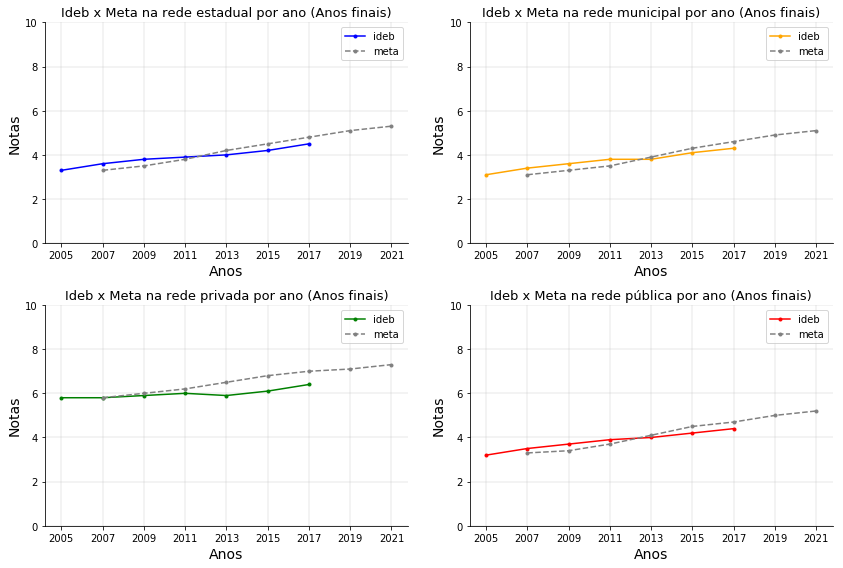

In [49]:
cols = ['ideb', 'meta'] # legendas
colors = ['white','blue', 'orange', 'green', 'red'] # cores das linhas

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plotar os gráficos
for i,j in zip(idm_nota2.columns[1:], range(1,5)):
    plt.subplot(2,2,j)
    plt.plot(idm_nota2.index, idm_nota2[i], '.-', color=colors[j])
    plt.plot(idm_meta2.index, idm_meta2[i], '.--', color='grey')
    plt.legend(cols, loc='best')
    plt.ylim(0, 10)
    plt.ylabel('Notas', fontsize=14)
    plt.xlabel('Anos', fontsize=14)
    plt.title('Ideb x Meta na rede ' + i + ' por ano (Anos finais)', fontsize=13)
    plt.grid(linestyle='-', linewidth=0.3)
    sns.despine()
    
plt.tight_layout()
plt.show()
fig.savefig('images/nota_media_anos_finais_nacional.png')

* O ideb estadual bate sua meta em 2009 e 2011, tendo ficado abaixo nas outras medições;
* O ideb municipal bate suas metas até 2011, depois fica abaixo nas demais medições;
* O ideb privado bate sua meta apenas em 2007;
* O ideb público bate suas metas até 2011, depois fica abaixo nas demais medições.

## 3 - Ensino médio

**3.1) Verificar desempenho do ideb apenas do total (ensino médio)**

In [29]:
# criar dataframe apenas das linhas dos anos iniciais, do tipo ideb
ideb_ensino_medio = base_dados[(base_dados['series'] == 'ensino médio') & (base_dados['tipo'] == 'ideb')].dropna(axis='columns')
ideb_ensino_medio

,series,tipo,administracao,2005,2007,2009,2011,2013,2015,2017
20,ensino médio,ideb,total,3.4,3.5,3.6,3.7,3.7,3.7,3.8
21,ensino médio,ideb,estadual,3.0,3.2,3.4,3.4,3.4,3.5,3.5
22,ensino médio,ideb,privada,5.6,5.6,5.6,5.7,5.4,5.3,5.8
23,ensino médio,ideb,pública,3.1,3.2,3.4,3.4,3.4,3.5,3.5


In [30]:
# Criar nova dataframe com a transposta selecionando apenas as colunas com as notas
ideb_ensino_medio_total = ideb_ensino_medio.loc[ideb_ensino_medio['administracao'] == 'total'].drop(['series', 'tipo', 'administracao'], axis=1)[:1].T

# Criar novos índices
ideb_ensino_medio_total.reset_index(inplace=True)
# Renomear coluna
ideb_ensino_medio_total.columns = ['Anos', 'Notas']

# Agora vamos criar uma coluna com a média para fazermos uma comparação dos valores de cada ano com a média
ideb_ensino_medio_total['Medias'] = ideb_ensino_medio_total['Notas'].mean()
ideb_ensino_medio_total

,Anos,Notas,Medias
0,2005,3.4,3.628571
1,2007,3.5,3.628571
2,2009,3.6,3.628571
3,2011,3.7,3.628571
4,2013,3.7,3.628571
5,2015,3.7,3.628571
6,2017,3.8,3.628571


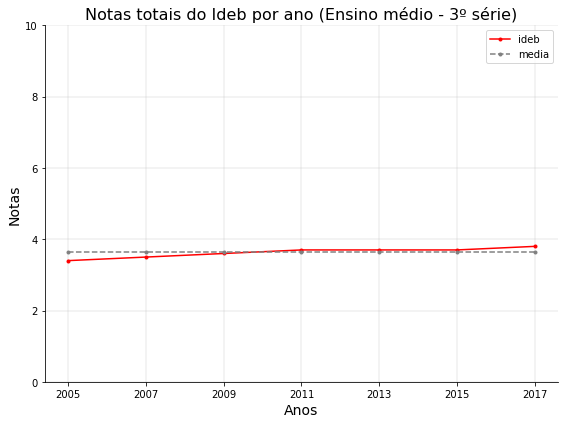

In [47]:
cols = ['ideb', 'media'] # legendas

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(ideb_ensino_medio_total['Anos'], ideb_ensino_medio_total['Notas'], '.-', color='red')
ax.plot(ideb_ensino_medio_total['Anos'], ideb_ensino_medio_total['Medias'], '--.', color='grey')
ax.legend(cols, loc='best')
ax.set_ylim(0,10)
ax.set_ylabel('Notas', fontsize=14)
ax.set_xlabel('Anos', fontsize=14)
ax.set_title('Notas totais do Ideb por ano (Ensino médio - 3º série)', fontsize=16)
plt.grid(lw=0.3)
sns.despine()

plt.tight_layout()
plt.show()
fig.savefig('images/ideb_ensino_medio_total_nacional.png')

O ideb do ensino médio cresce muito pouco, saindo de pouco mais de 3.5 e não chegando nem a 4 pontos. As notas quase não se deslocam em relação a média. 

**3.2) Verificar o Ideb por administração (ensino médio)**

In [33]:
# Atribuir valores das colunas dos anos, menos a primeira linha que é o total 
# fazendo a transposta, de forma que os índices sejam os anos
ideb_ensino_medio_admin = ideb_ensino_medio.drop(['series', 'tipo', 'administracao'], axis=1)[1:].T

# Criar novos índices
ideb_ensino_medio_admin.reset_index(inplace=True)
# Colunas
cols = np.array(ideb_ensino_medio['administracao'][1:])
# Adicionar coluna Anos na posição zero
cols = np.insert(cols, 0, 'Anos')

# Atribuir as colunas para o novo dataframe
ideb_ensino_medio_admin.columns = cols
ideb_ensino_medio_admin

,Anos,estadual,privada,pública
0,2005,3.0,5.6,3.1
1,2007,3.2,5.6,3.2
2,2009,3.4,5.6,3.4
3,2011,3.4,5.7,3.4
4,2013,3.4,5.4,3.4
5,2015,3.5,5.3,3.5
6,2017,3.5,5.8,3.5


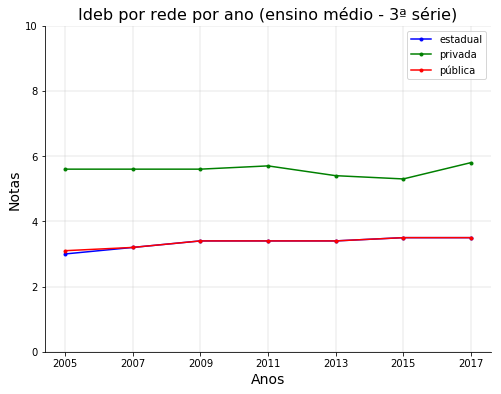

In [65]:
cores = ['blue','green', 'red'] # cores das linhas

fig, ax = plt.subplots(figsize=(8,6))

ax.plot(ideb_ensino_medio_admin['Anos'], ideb_ensino_medio_admin.iloc[:, 1:], '.-')
ax.legend(ideb_ensino_medio_admin.iloc[:, 1:], loc='best')
ax.set_xlabel('Anos', fontsize=14)
ax.set_ylabel('Notas', fontsize=14)
ax.set_title('Ideb por rede por ano (ensino médio - 3ª série)', fontsize=16)
ax.set_ylim(0, 10)
sns.despine()

plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['b', 'g', 'r']) # mudar padrão das cores
plt.grid(lw=0.3)
plt.show()
fig.savefig('images/ideb_ensino_medio_admin_nacional.png')

* Há crescimento em todas administrações, com um recuo da rede privada em 2013 e depois em 2015. 
* A variação do crescimento na rede estadual e pública é muito baixo, não chegando a 0.5 pontos. 
* A rede privada também fica praticamente estagnada, ficando próxima da nota 6.

**3.3) Ideb x metas (ensino médio)**

In [35]:
# Vamos usar apenas as series dos anos finais, e tirar esta coluna
ideb_metas_ensino_medio = base_dados[base_dados['series'] == 'ensino médio'].drop(['series'], axis=1)
ideb_metas_ensino_medio

,tipo,administracao,2005,2007,2009,2011,2013,2015,2017,2019,2021
20,ideb,total,3.4,3.5,3.6,3.7,3.7,3.7,3.8,NaN,NaN
21,ideb,estadual,3.0,3.2,3.4,3.4,3.4,3.5,3.5,NaN,NaN
22,ideb,privada,5.6,5.6,5.6,5.7,5.4,5.3,5.8,NaN,NaN
23,ideb,pública,3.1,3.2,3.4,3.4,3.4,3.5,3.5,NaN,NaN
24,meta,total,NaN,3.4,3.5,3.7,3.9,4.3,4.7,5.0,5.2
25,meta,estadual,NaN,3.1,3.2,3.3,3.6,3.9,4.4,4.6,4.9
26,meta,privada,NaN,5.6,5.7,5.8,6.0,6.3,6.7,6.8,7.0
27,meta,pública,NaN,3.1,3.2,3.4,3.6,4.0,4.4,4.7,4.9


In [36]:
# Vamor criar um dataframe apenas com os idebs, eliminando colunas indesejadas
# mudando o nome das colunas e fazendo a transposta
idm_nota3 = ideb_metas_ensino_medio[ideb_metas_ensino_medio['tipo'] == 'ideb'].drop(['tipo', 'administracao'], axis=1).T
idm_nota3.columns = ideb_metas_ensino_medio['administracao'].unique()
idm_nota3

,total,estadual,privada,pública
2005,3.4,3.0,5.6,3.1
2007,3.5,3.2,5.6,3.2
2009,3.6,3.4,5.6,3.4
2011,3.7,3.4,5.7,3.4
2013,3.7,3.4,5.4,3.4
2015,3.7,3.5,5.3,3.5
2017,3.8,3.5,5.8,3.5
2019,NaN,NaN,NaN,NaN
2021,NaN,NaN,NaN,NaN


In [37]:
# Vamor criar um dataframe apenas com as metas, eliminando colunas indesejadas
# mudando o nome das colunas e fazendo a transposta
idm_meta3 = ideb_metas_ensino_medio[ideb_metas_ensino_medio['tipo'] == 'meta'].drop(['tipo', 'administracao'], axis=1).T
idm_meta3.columns = ideb_metas_ensino_medio['administracao'].unique()
idm_meta3

,total,estadual,privada,pública
2005,NaN,NaN,NaN,NaN
2007,3.4,3.1,5.6,3.1
2009,3.5,3.2,5.7,3.2
2011,3.7,3.3,5.8,3.4
2013,3.9,3.6,6.0,3.6
2015,4.3,3.9,6.3,4.0
2017,4.7,4.4,6.7,4.4
2019,5.0,4.6,6.8,4.7
2021,5.2,4.9,7.0,4.9


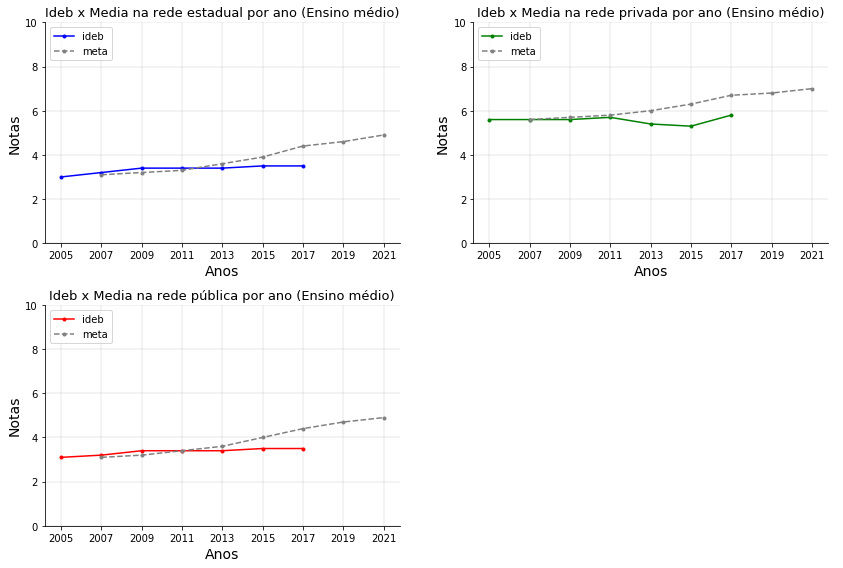

In [53]:
cols = ['ideb', 'meta'] # legendas
colors = ['white','blue', 'green', 'red'] # cores das linhas

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plotar os gráficos
for i,j in zip(idm_nota3.columns[1:], range(1,4)):
    plt.subplot(2,2,j)    
    plt.plot(idm_nota3.index, idm_nota3[i], '.-', color=colors[j])
    plt.plot(idm_meta3.index, idm_meta3[i], '.--', color='grey')
    
    plt.legend(cols, loc='upper left')
    plt.ylim(0, 10)
    plt.ylabel('Notas', fontsize=14)
    plt.xlabel('Anos', fontsize=14)
    plt.title('Ideb x Media na rede ' + i + ' por ano (Ensino médio)', fontsize=13)
    plt.grid(linestyle='-', linewidth=0.3)
    sns.despine()
    ax[-1, -1].axis('off') # esconde o último gráfico sem dados
    
plt.tight_layout()
plt.show()
fig.savefig('images/nota_media_ensino_medio_nacional.png')

* Educação estadual bate suas metas até 2011 apenas;
* Educação privada bate suas metas apenas em 2007, e a partir de 2013 ficando quase 1 ponto da meta;
* Educação pública bate suas metas até 2011;
* Não há ensino médio municipal.

## 4 - Análise séries x administração

Agora vamos fazer uma análise geral, comparando as notas dos idebs das séries pelas administrações (redes).

In [39]:
# Vamo pegar os dados dos idebs, e deixar de fora a linha do total, 
# pois queremos analisar o desempenho das administrações pelas séries
ideb_series = base_dados[
    (base_dados['tipo'] == 'ideb') & (base_dados['administracao'] != 'total')].dropna(axis='columns').drop(['tipo'], axis=1)

# Vamos adicionar uma linha vazia para municipio, para não dar erro no gráfico
nova_linha = ['ensino médio', 'municipal', np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]
y = pd.DataFrame(data=[nova_linha], 
                 columns=ideb_series.columns)

# Concatenamos os dataframes e zeramos a colunas de índice
ideb_series_final = pd.concat((ideb_series, y), axis=0).reset_index(drop=True)
ideb_series_final

,series,administracao,2005,2007,2009,2011,2013,2015,2017
0,anos iniciais,estadual,3.9,4.3,4.9,5.1,5.4,5.8,6.0
1,anos iniciais,municipal,3.4,4.0,4.4,4.7,4.9,5.3,5.6
2,anos iniciais,privada,5.9,6.0,6.4,6.5,6.7,6.8,7.1
3,anos iniciais,pública,3.6,4.0,4.4,4.7,4.9,5.3,5.5
4,anos finais do ensino fundamental,estadual,3.3,3.6,3.8,3.9,4.0,4.2,4.5
5,anos finais do ensino fundamental,municipal,3.1,3.4,3.6,3.8,3.8,4.1,4.3
6,anos finais do ensino fundamental,privada,5.8,5.8,5.9,6.0,5.9,6.1,6.4
7,anos finais do ensino fundamental,pública,3.2,3.5,3.7,3.9,4.0,4.2,4.4
8,ensino médio,estadual,3.0,3.2,3.4,3.4,3.4,3.5,3.5
9,ensino médio,privada,5.6,5.6,5.6,5.7,5.4,5.3,5.8


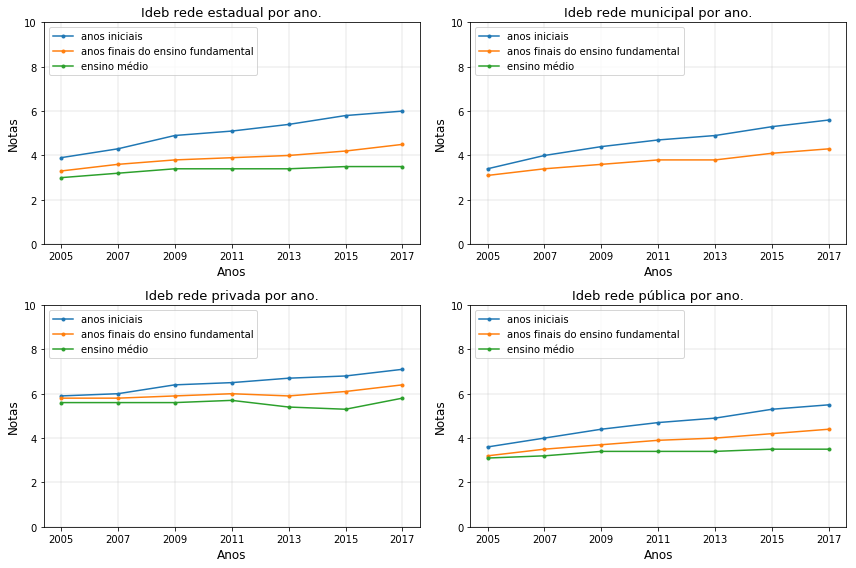

In [52]:
cols = ideb_series_final['series'].unique() # Series
adms = ideb_series_final['administracao'].unique() # administrações

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i,j in zip(adms, range(1,5)):
    df = ideb_series_final[ideb_series_final['administracao'] == i].drop(['administracao', 'series'], axis=1).T
    df.columns = cols
    plt.subplot(2,2,j)
    plt.plot(df.index, df, '.-')
    plt.legend(df.columns, loc='upper left')
    plt.title('Ideb rede ' + i + ' por ano.', fontsize=13)
    plt.ylim(0,10)
    plt.xlabel('Anos', fontsize=12)
    plt.ylabel('Notas', fontsize=12)
    plt.grid(ls='-', lw=0.3)

plt.tight_layout()
plt.show()
fig.savefig('images/todas_redes_nacional.png')